# AYA Project

In [1]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("DESeq2", version = "3.8")
library("DESeq2")
#BiocManager::install("genefilter", version = "3.8")
library(genefilter)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

In [2]:
library('plyr') #package pour table de comptage
library(magrittr)
library("varhandle")
#library(tidyr)


Attaching package: ‘plyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename



### SOUS GROUPE ADVERSE-complex

In [3]:
data_API = read.csv("/home/safia/Documents/AYA/Leucegene risk complete.txt",header = T,sep = "\t")
data_API<- data.frame(data_API[,-1], row.names=data_API[,1])

t_data_API = as.data.frame(t(data_API)) # inverse colonne ligne
colnames(t_data_API) <- gsub(" ","_",colnames(t_data_API)) # remplace les espaces dans le nom des colonnes
t_data_API <- head(t_data_API, -1) # supprimme la deriniere ligne data_type 

inf_40 = t_data_API[which(as.integer(t_data_API$Age_at_diagnosis)<=40),]
data_AYA = inf_40[which(as.integer(inf_40$Age_at_diagnosis)>=18),]
#data_AYA = data_AYA[which(unfactor(data_AYA$`blasts_(%)`)>=70),]

In [4]:
adverse = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="adverse cytogenetics"),])
API_Adv = data_AYA[which(rownames(data_AYA) %in% adverse),]
count_Adv_subgroup = count(API_Adv, "cytogenetic_subgroup")

In [5]:
complex = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[1]),])

In [6]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]

names(read_count) = substring(names(read_count),8)


In [7]:
library("tidyr")
library("dplyr")
library("ggplot2")


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract

The following object is masked from ‘package:S4Vectors’:

    expand


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects a

In [8]:
complex = substring(complex,2)
count_complex = read_count[,complex]
colnames(count_complex) = paste("Cpx", colnames(count_complex), sep = "_")

In [9]:
#control CD34
count_ctl = read.table("/home/safia/Documents/AYA_project/cd34_4reps.txt", header = T, sep="\t")

count_ctl<- data.frame(count_ctl[,-1], row.names=count_ctl[,1])
count_ctl = count_ctl[-c(1:4),]

count_ctl = count_ctl[,-c(5:8)]
names(count_ctl) = c("ctl_1","ctl_3","ctl_2","ctl_4")

In [10]:
common_genes = intersect(rownames(count_ctl),rownames(count_complex))
count_ctl_1 = count_ctl[which(rownames(count_ctl) %in% common_genes),]
count_complex_1 = count_complex[which(rownames(count_complex) %in% common_genes),]

In [11]:
df_IF = cbind(count_complex_1,count_ctl_1)


samples_IF <- data.frame(groups = substr(colnames(df_IF), 1, 3))


ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)
colnames(ds_IF) <- colnames(counts)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)


res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 2905 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row                baseMean   log2FoldChange lfcSE     stat      pvalue      
1 ENSG00000211753.4     30.6814   9.484935     0.7284521  13.02067 9.334799e-39
2 ENSG00000156875.13  5801.1276  -5.667624     0.4380467 -12.93840 2.732554e-38
3 ENSG00000163041.9  12715.0719  -2.380559     0.2097035 -11.35203 7.246337e-30
4 ENSG00000130429.12  5269.6348  -4.953612     0.4379866 -11.30996 1.171381e-29
5 ENSG00000100359.20  2541.1501  -5.004729     0.4530701 -11.04626 2.285430e-28
6 ENSG00000012223.12 32042.9108 -13.081534     1.1976566 -10.92261 8.987757e-28
  padj        
1 2.511994e-34
2 3.676652e-34
3 6.499964e-26
4 7.880469e-26
5 1.230019e-24
6 4.031009e-24

In [12]:
gene_sgn = res[which(res$padj<0.05),]$row
length(gene_sgn)
count_complex_sgn = count_complex[gene_sgn,]

[1] 1759

In [13]:
#selecting genes with low survival rates 


### Clustering adverse

In [14]:
cohort_IQR = apply(count_complex_sgn,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)
ordered_data=count_complex_sgn[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)

In [15]:
library("clValid")
#install.packages("kohonen")
library("kohonen")
library("mclust")

Loading required package: cluster
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: ‘mclust’

The following object is masked from ‘package:kohonen’:

    map



In [ ]:
clv <- clValid(tordered_data, 2:10, clMethods=c("hierarchical", "kmeans",  "pam"), 
               validation=c("internal","stability"))
clv

In [ ]:
res <- getRanksWeights(clv)
if(require("RankAggreg")) {
  CEWS <- RankAggreg(x=res$ranks, k=5, weights=res$weights, seed=123, verbose=FALSE)
  CEWS
  
}

In [ ]:
optimalScores(clv)
plot(clv)



In [45]:


library("amap")
library("dendextend")
#library("dendextendRcpp")

#library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

#install.packages("fpc")
library("fpc")

In [46]:
sample_dist=Dist(tordered_data, method = "spearman")
#met_clust=unlist(strsplit(CEWS$top.list[1], "-"))[1] 
#nclust = unlist(strsplit(CEWS$top.list[1], "-"))[2]
met_clust="kmeans"
nclust = 10


if (met_clust == "hierarchical"){
 hc =  hclust(sample_dist,method = "average")
 samples_IF <-  data.frame(groups = as.character(as.vector(cutree(hc, k = nclust))))

 dend <- as.dendrogram(hc)
 
 dend %>% color_branches(k=unlist(strsplit(CEWS$top.list[1], "-"))[2]) %>% plot(horiz=TRUE)
 
 }else if (met_clust == "kmeans"){
   clusters <- kmeans(tordered_data, nclust)
   plotcluster(tordered_data, clusters$cluster)
   #fviz_cluster(clusters, data = express)
   samples_IF <-  data.frame(groups = as.character(as.vector(clusters$cluster)))
    
 }else if (met_clust == "pam"){
   pam_fit <- pam(sample_dist, diss = TRUE, k = nclust)
   samples_IF <-  data.frame(groups = as.character(as.vector(pam_fit$clustering)))
   fviz_silhouette(silhouette(pam_fit))
   
 }


Warning message in sqrt(wmd):
“NaNs produced”

In [31]:
ds_IF <- DESeqDataSetFromMatrix(countData=count_complex_sgn, colData=samples_IF, design=~groups)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1271 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [32]:
res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[which(res$padj)<0.05]
stopifnot(all(goi %in% names(ds_IF)))
length(goi)

library(tidyr)

tcounts <- t(log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_IF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))



row                baseMean  log2FoldChange lfcSE     stat      pvalue      
1 ENSG00000225492.6  149.53954  6.275513      0.8100671  7.746906 9.415878e-15
2 ENSG00000130054.4   71.09943 23.076097      2.9859078  7.728335 1.089621e-14
3 ENSG00000184838.14 998.84321 -9.881197      1.4628419 -6.754795 1.430376e-11
4 ENSG00000138135.6  584.16004 -9.447011      1.4076241 -6.711316 1.928764e-11
5 ENSG00000279166.1  131.28784 -3.196050      0.4865112 -6.569326 5.054353e-11
6 ENSG00000188171.15 262.73824  5.047039      0.7800144  6.470444 9.771564e-11
  padj        
1 1.566929e-10
2 1.566929e-10
3 1.371301e-07
4 1.386830e-07
5 2.907365e-07
6 4.133800e-07

[1] "ENSG00000225492.6"  "ENSG00000130054.4"  "ENSG00000184838.14"
[4] "ENSG00000138135.6"  "ENSG00000279166.1"  "ENSG00000188171.15"
[7] "ENSG00000259678.1"  "ENSG00000108018.15" "ENSG00000204740.9"

Row.names groups sizeFactor replaceable gene              expression
1 01H001    1      1.0754568  FALSE       ENSG00000225492.6 2.8091803 
2 02H017    2      0.7148424  FALSE       ENSG00000225492.6 3.1527446 
3 03H036    3      1.2641438   TRUE       ENSG00000225492.6 6.0478239 
4 03H067    2      1.2502889  FALSE       ENSG00000225492.6 3.4459381 
5 04H054    3      0.8271376   TRUE       ENSG00000225492.6 3.7864788 
6 04H120    1      1.1316504  FALSE       ENSG00000225492.6 0.4684948

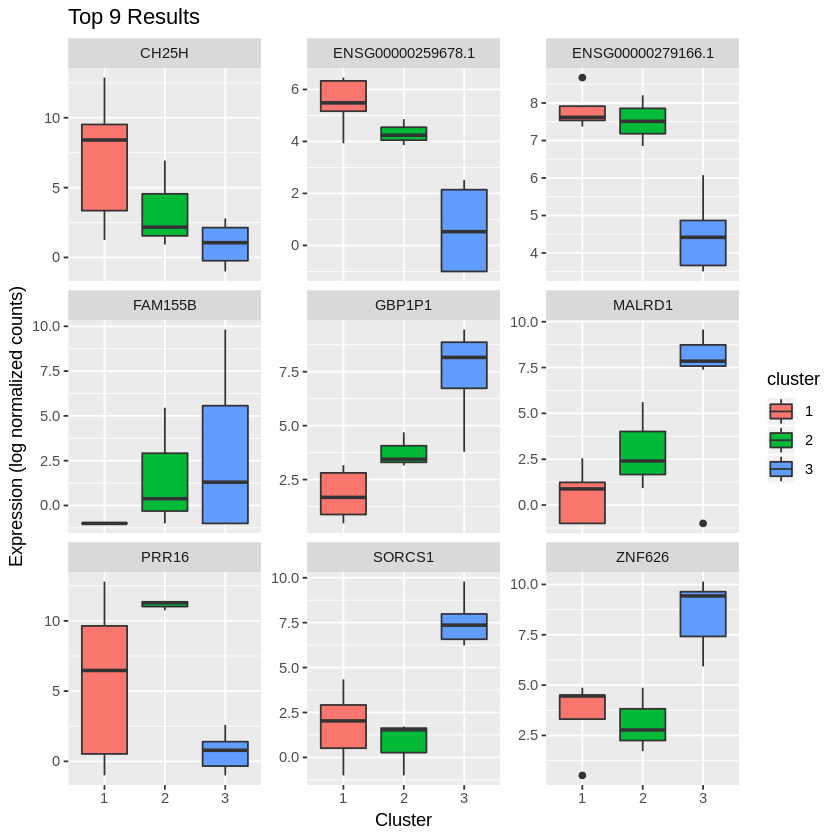

In [33]:
library(ggsignif)
library("biomaRt")

mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
        if (a != ""){
            tcounts$gene[i] = a
        }
         
    }
}
ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot()+ 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cluster", 
       y="Expression (log normalized counts)", 
       fill="cluster", 
       title="Top 9 Results")


Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in res$row[i] <- a:
“number of items to replace is not a multiple of replacement length”



|Gene.symbol       |     logFC| adj.P.Val|
|:-----------------|---------:|---------:|
|GBP1P1            |  6.275513|     0e+00|
|FAM155B           | 23.076097|     0e+00|
|PRR16             | -9.881197|     1e-07|
|CH25H             | -9.447011|     1e-07|
|ENSG00000279166.1 | -3.196051|     3e-07|
|ZNF626            |  5.047039|     4e-07|

Warning message in run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG"):
“There already is a directory named "pathfindR_Results".
Writing the result to "pathfindR_Results(7)" not to overwrite the previous results.”## Testing input


The input looks OK


## Processing input. Converting gene symbols, if necessary (and if human gene symbols provied)


Could not find any interactions for 2000 (83.68%) genes in the PIN


## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations 


## Annotating involved genes and visualizing pathways


'select()' returned 1:many mapping between keys and columns
Info: Downloading xml files for hsa04062, 1/1 pathways..
Info: Downloading png files for hsa04062, 1/1 pathways..
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/safia/Documents/AYA_project/pathfindR_Results(7)/pathway_visualizations
Info: Writing image file hsa04062.Chemokine signaling pathwa

  |......................                                           |  33%
   inline R code fragments

  |...........................................                      |  67%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |.................................................................| 100%
  ordinary text without R code




output file: results.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS results.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc9b95080ca56.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmpf3DKzd/rmarkdown-str9b92ec9c513.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: results.html


processing file: enriched_pathways.Rmd


  |.......                                                          |  11%
   inline R code fragments

  |..............                                                   |  22%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |......................                                           |  33%
  ordinary text without R code

  |.............................                                    |  44%
label: pathview (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA

  |....................................                             |  56%
  ordinary text without R code

  |...........................................                      |  67%
label: table (with options) 
List of 2
 $ echo   : symbol F
 $ comment: logi NA

  |...................................................              |  78%
  ordinary text without R code

  |..........................................................       |  89%
label: pathview_ref (with options) 
List of 2


output file: enriched_pathways.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS enriched_pathways.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc9b9d278d9b.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmpf3DKzd/rmarkdown-str9b92a60f9fd.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: enriched_pathways.html


processing file: conversion_table.Rmd


  |...........                                                      |  17%
   inline R code fragments

  |......................                                           |  33%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |................................                                 |  50%
  ordinary text without R code

  |...........................................                      |  67%
label: table1 (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA

  |......................................................           |  83%
  ordinary text without R code

  |.................................................................| 100%
label: table2 (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA




output file: conversion_table.knit.md



/home/safia/anaconda3/bin/pandoc +RTS -K512m -RTS conversion_table.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output pandoc9b939405015.html --smart --email-obfuscation none --self-contained --standalone --section-divs --template /home/safia/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:bootstrap' --include-in-header /tmp/Rtmpf3DKzd/rmarkdown-str9b930196ebb.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: conversion_table.html
Plotting the enrichment bubble chart


Found 120 enriched pathways


Pathway enrichment results and table of converted genes 
can be found in "results.html" 
in the folder "/home/safia/Documents/AYA_project/pathfindR_Results(7)"


Run choose_clusters() for clustering pathways






|ID       |Pathway                     | Fold_Enrichment| occurrence| lowest_p| highest_p|Up_regulated                                       |Down_regulated                                                                            |
|:--------|:---------------------------|---------------:|----------:|--------:|---------:|:--------------------------------------------------|:-----------------------------------------------------------------------------------------|
|hsa04062 |Chemokine signaling pathway |        24.26455|         10|        0|         0|PPBP, CXCL9, PF4, CCL18, CCL25, JAK3, GNAI1, TIAM1 |CCL17, CCL22, CCL28, CXCR4, HCK, FGR, RAF1, MAP2K1, CHUK, NCF1, GRK1, ARRB2               |
|hsa04066 |HIF-1 signaling pathway     |        36.59043|         10|        0|         0|EGF, ERBB2, RPS6, EPO, ANGPT2, HK1                 |TLR4, IFNGR1, INSR, MAP2K1, CYBB, PRKCG, CAMK2D, CAMK2B, VEGFA, EDN1, HK3, PFKFB3, CDKN1A |

The maximum average silhouette width was 266 for k = 10 




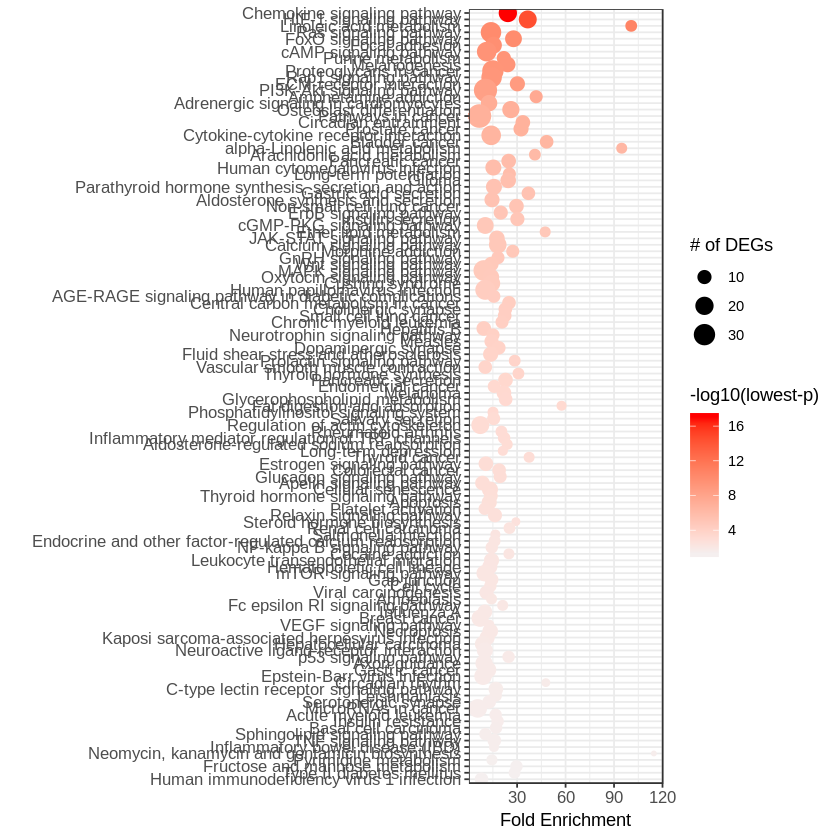



|ID       |Pathway                     | Fold_Enrichment| occurrence| lowest_p| highest_p|Up_regulated                                       |Down_regulated                                                                            | Cluster|Status         |
|:--------|:---------------------------|---------------:|----------:|--------:|---------:|:--------------------------------------------------|:-----------------------------------------------------------------------------------------|-------:|:--------------|
|hsa04062 |Chemokine signaling pathway |        24.26455|         10|        0|         0|PPBP, CXCL9, PF4, CCL18, CCL25, JAK3, GNAI1, TIAM1 |CCL17, CCL22, CCL28, CXCR4, HCK, FGR, RAF1, MAP2K1, CHUK, NCF1, GRK1, ARRB2               |       1|Representative |
|hsa04066 |HIF-1 signaling pathway     |        36.59043|         10|        0|         0|EGF, ERBB2, RPS6, EPO, ANGPT2, HK1                 |TLR4, IFNGR1, INSR, MAP2K1, CYBB, PRKCG, CAMK2D, CAMK2B, VEGFA, EDN1, HK3, PFKF



|    |ID       |Pathway                                         | Fold_Enrichment| occurrence|  lowest_p| highest_p|Up_regulated                                                           |Down_regulated                                                                                 | Cluster|Status         |
|:---|:--------|:-----------------------------------------------|---------------:|----------:|---------:|---------:|:----------------------------------------------------------------------|:----------------------------------------------------------------------------------------------|-------:|:--------------|
|1   |hsa04062 |Chemokine signaling pathway                     |        24.26455|         10| 0.0000000| 0.0000000|PPBP, CXCL9, PF4, CCL18, CCL25, JAK3, GNAI1, TIAM1                     |CCL17, CCL22, CCL28, CXCR4, HCK, FGR, RAF1, MAP2K1, CHUK, NCF1, GRK1, ARRB2                    |       1|Representative |
|3   |hsa00591 |Linoleic acid metabolism                        |   

The maximum average silhouette width was 266 for k = 10 




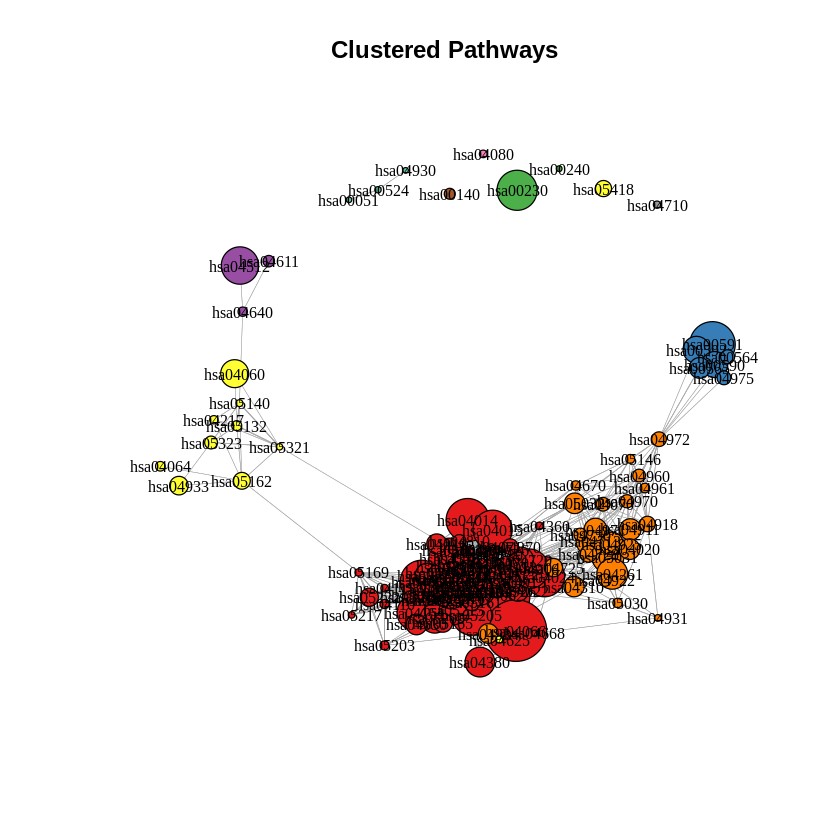

The maximum average silhouette width was 266 for k = 10 




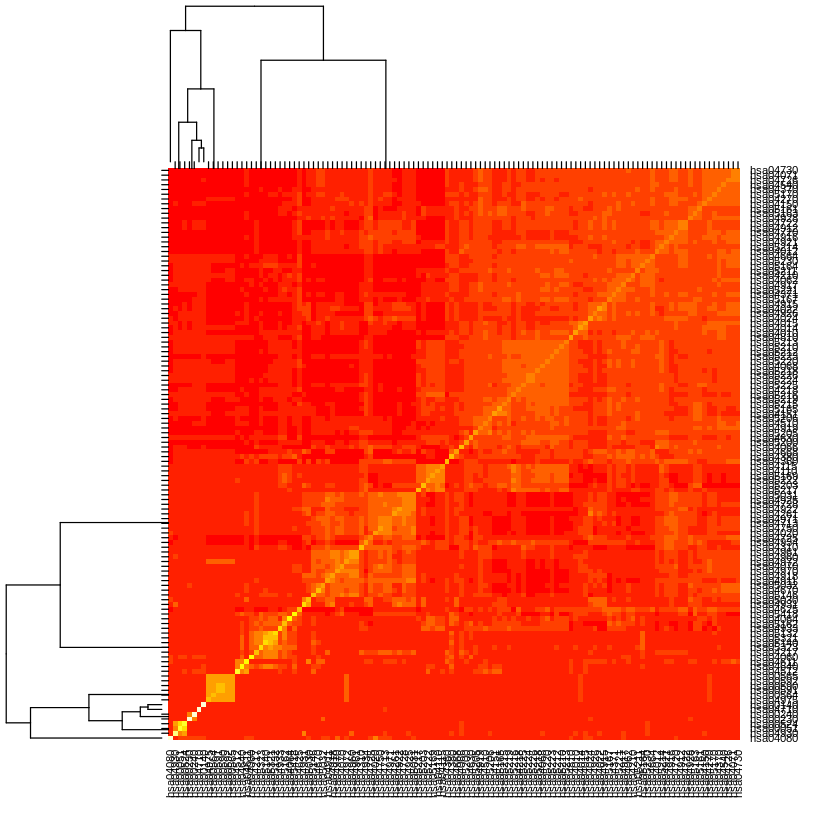

Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”Warning message in if (a != "") {:
“the condition has length > 1 and only the first element will be used”Warning message in rownames(exp_mat)[i] <- a:
“number of items to replace is not a multiple of replacement length”

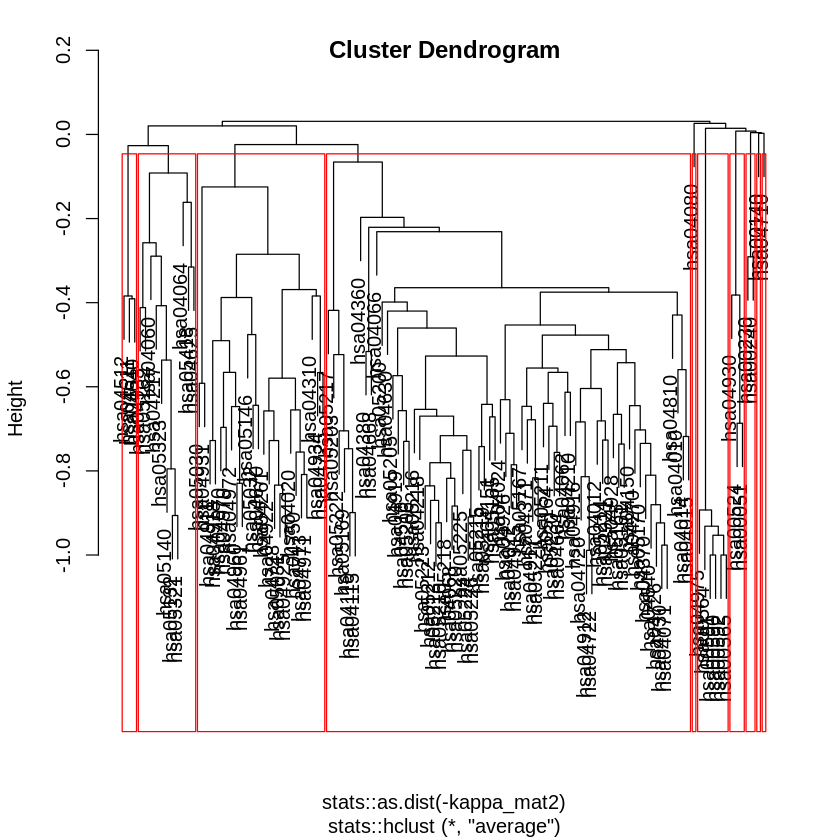

In [34]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- res$row
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
                                                          "hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
  if (genes[i] %in% G_list$ensembl_gene_id){
    a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    if (a != ""){
      res$row[i] = a
    }
    
  }
}

res_mart = res[,c(1,3,7)]
colnames(res_mart)= c("Gene.symbol","logFC","adj.P.Val")

res_mart_na = as.data.frame(na.omit(res_mart))
res_mart_na$adj.P.Val = as.numeric(as.character(res_mart_na$adj.P.Val))

suppressPackageStartupMessages(library(pathfindR))

knitr::kable(head(res_mart_na))
#RA_output <- run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG", search_method = "SA")
RA_output <- run_pathfindR(res_mart_na, pin_name = "KEGG", gene_sets = "KEGG")
knitr::kable(head(RA_output, 2))

RA_clustered <- cluster_pathways(RA_output)
knitr::kable(head(RA_clustered, 2))
knitr::kable(RA_clustered[RA_clustered$Status == "Representative", ])
RA_clustered <- cluster_pathways(RA_output, plot_hmap = TRUE, plot_clusters_graph = FALSE)
RA_clustered <- cluster_pathways(RA_output, plot_dend = TRUE, plot_clusters_graph = FALSE)

## Pathway scores per samples
## Pathway data frame
pws_table <- RA_clustered
pws_table <- pws_table[pws_table$Status == "Representative", ]


## Expression matrix
  goi <- rownames(res_IF)
stopifnot(all(goi %in% names(ds_IF)))
exp_mat <- log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))

colnames(exp_mat) = colnames(df_IF)

mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- rownames(exp_mat)
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
                                                          "hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
  if (genes[i] %in% G_list$ensembl_gene_id){
    a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    if (a != ""){
      rownames(exp_mat)[i] = a
    }
    
  }
}





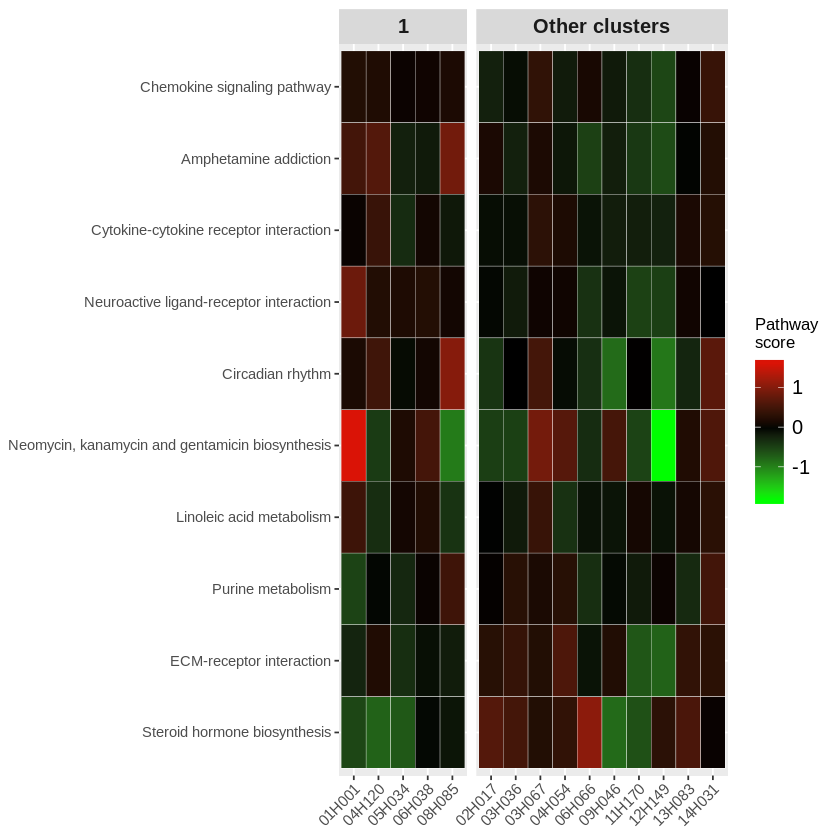

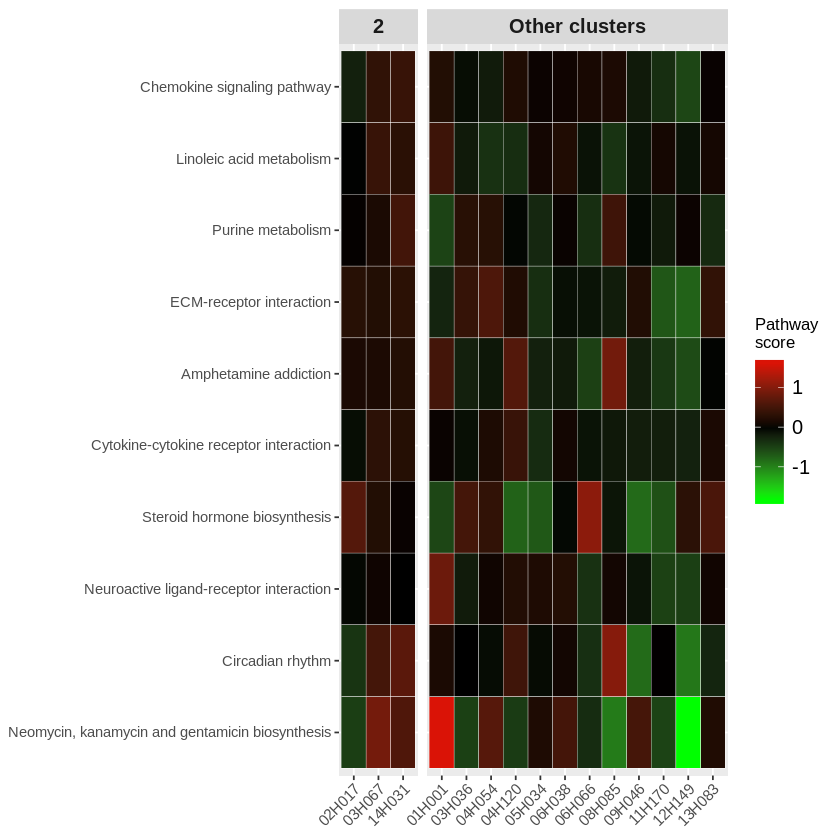

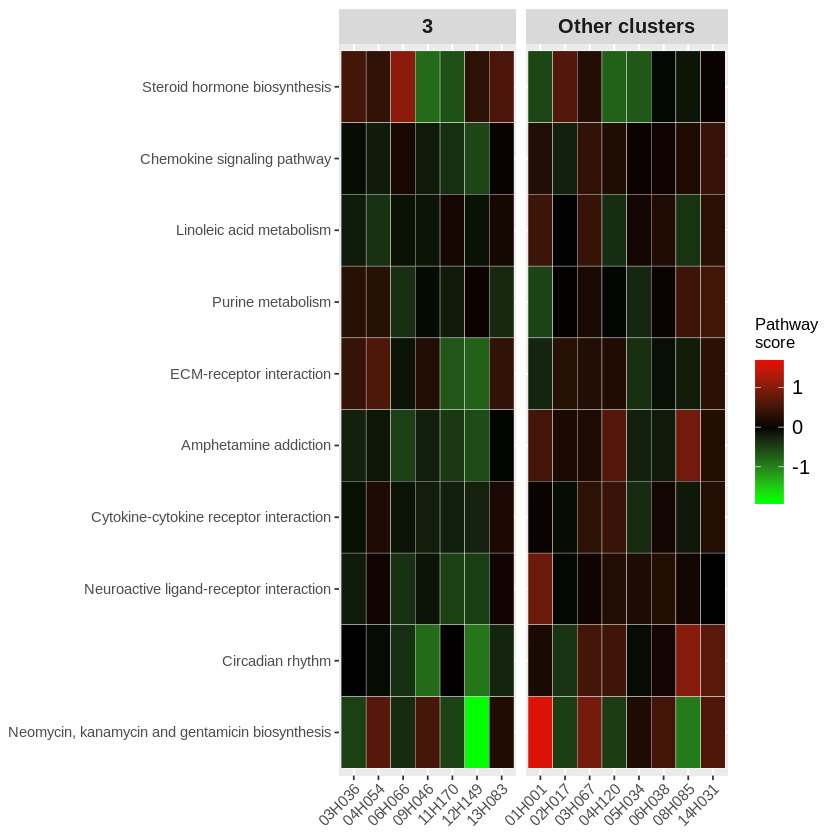

In [35]:

for (i in 1:3){
## Vector of "Case" IDs
cases <- names(pam_fit$clustering[which(pam_fit$clustering == i)])

## Calculate pathway scores and plot heatmap
score_matrix <- calculate_pw_scores(pws_table, exp_mat, cases, case_control_titles = c(i, "Other clusters"))
}